In [18]:
from pathlib import Path
Path.cwd()


WindowsPath('c:/Users/spoeun/Desktop/Hackathon2023')

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier ### Decision Tree for classification

In [20]:
loan_df = pd.read_csv('UniversalBank.csv')
loan_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Accept_Loan
0,53,29,22,2,0.40,1,0,0,0,1,0,0
1,36,6,25,1,0.67,3,0,0,0,1,0,0
2,62,38,39,4,2.20,1,0,1,0,1,0,0
3,46,21,159,3,1.90,3,315,0,0,1,0,1
4,56,31,35,3,0.10,2,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60,36,39,4,1.30,2,140,0,0,1,0,0
3996,55,31,13,4,0.70,1,0,0,0,1,0,0
3997,46,22,28,1,1.00,1,84,0,0,1,1,0
3998,46,22,89,4,1.40,2,0,0,0,1,0,0


In [21]:
def validation_split(data_df, valid_ratio): # data_df is the original dataframe, valid ratio is the desired proportion of validation data 
    split_dict = {}
    import numpy as np
    np.random.seed(0) ## this just makes sure you get the same split if you re-run
    data_df["random"] = list(np.random.uniform(0.0, 1.0, len(data_df.index))) 
    data_df["valid"] = (data_df.random <=valid_ratio)
    split_dict["valid"]   = data_df[data_df.valid].drop(columns = ["random", "valid"])
    split_dict["train"]   = data_df[~data_df.valid].drop(columns = ["random", "valid"])
    return(split_dict)

In [22]:
# Divide loan_df into valid and training data    
loan_df_valid = validation_split(loan_df, 0.3)["valid"]

In [23]:
loan_df_train = validation_split(loan_df, 0.3)["train"]


In [24]:
#training data
train_predictors = loan_df_train.drop(columns = "Accept_Loan")
train_actual = loan_df_train["Accept_Loan"]

In [25]:
#Validation
valid_predictors = loan_df_valid.drop(columns = "Accept_Loan")
valid_actual = loan_df_valid["Accept_Loan"]

In [26]:
#Tree
tree_loan = DecisionTreeClassifier(max_depth = 3, min_samples_split = 20, min_samples_leaf = 10) 
tree_loan.fit(train_predictors, train_actual)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20)

<function matplotlib.pyplot.show(close=None, block=None)>

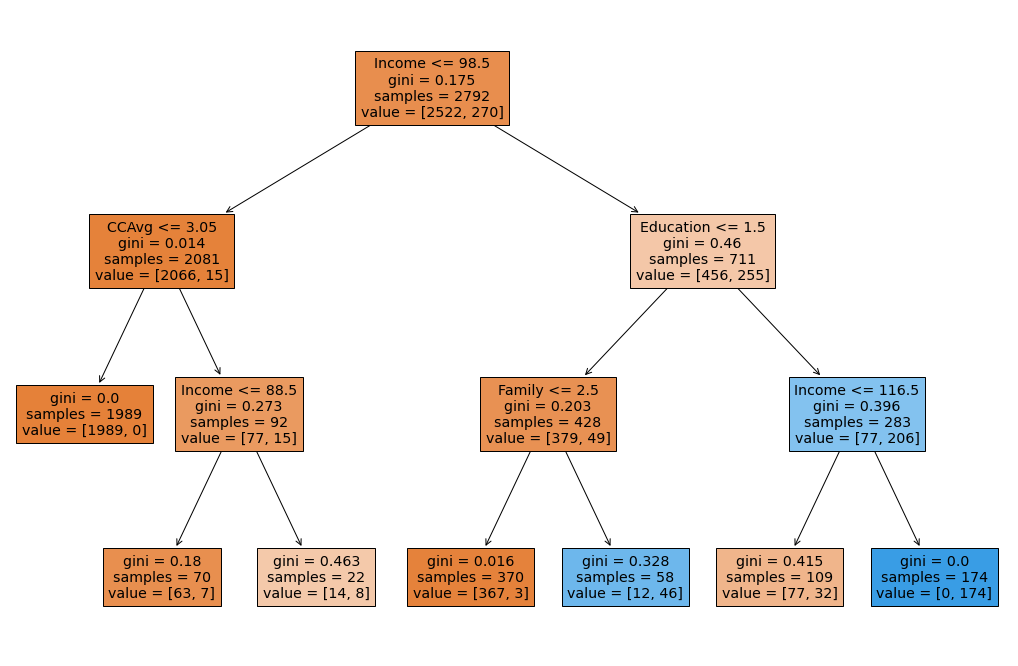

In [27]:
#Graph the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,12))
plot_tree(tree_loan, feature_names = train_predictors.columns, filled = True)
plt.show

In [28]:
#Baseline accuracy
# loan_df.shape five 4000 by 14 table

baseline_percent=sum(loan_df.Accept_Loan==1)/4000
print(str(100-(baseline_percent*100))+('%'))

#90.5% accuracy

90.5%


In [29]:
#Testing accuracy
loan_df_train["Tree1_Prediction"] = tree_loan.predict(train_predictors)  
loan_df_valid["Tree1_Prediction"] = tree_loan.predict(valid_predictors)


In [30]:
#Matrix
def Class_Metrics(actual, predicted):
    CM = {}
    for item in ["TP","FP","TN","FN", "ACC","PREC","RECALL"]: #initialzing all of them to zero 
        CM[item] = 0
    length = len(actual)
    for indexnum in range(0,length):
        CM["TP"] = CM["TP"] + (actual[indexnum] == 1 and predicted[indexnum] ==1)
        CM["FP"] = CM["FP"] + (actual[indexnum] == 0 and predicted[indexnum] ==1)
        CM["TN"] = CM["TN"] + (actual[indexnum] == 0 and predicted[indexnum] ==0)
        CM["FN"] = CM["FN"] + (actual[indexnum] == 1 and predicted[indexnum] ==0)
    # Accuracy is calculated after the for loop 
    CM["ACC"] = (CM["TP"] + CM["TN"])/length
    CM["PREC"] = CM["TP"] /(CM["TP"] + CM["FP"] )
    CM["RECALL"] = CM["TP"] /(CM["TP"] + CM["FN"] )
    return(CM)

In [31]:
#Validation Accuracy
Class_Metrics(list(loan_df_valid["Accept_Loan"]), list(loan_df_valid["Tree1_Prediction"]))

#98.4% accuracy when tested against original data 

{'TP': 93,
 'FP': 2,
 'TN': 1096,
 'FN': 17,
 'ACC': 0.984271523178808,
 'PREC': 0.9789473684210527,
 'RECALL': 0.8454545454545455}

In [32]:
#Training Accuracy
Class_Metrics(list(loan_df_train["Accept_Loan"]), list(loan_df_train["Tree1_Prediction"])) 

#97.8% accuracy when tested against new data

{'TP': 220,
 'FP': 12,
 'TN': 2510,
 'FN': 50,
 'ACC': 0.9777936962750716,
 'PREC': 0.9482758620689655,
 'RECALL': 0.8148148148148148}

In [35]:
#Testing out data 
x = tree_loan.predict(np.array([46,21,156,3,1.9,3,315,0,0,1,0]).reshape(1,-1))
x


array([1], dtype=int64)

In [37]:
loan_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Accept_Loan', 'random', 'valid'],
      dtype='object')